### [Unique Paths](https://leetcode.com/problems/unique-paths/description/)

A robot is located at the top-left corner of a m x n grid (marked 'Start' in the diagram below).

The robot can only move either down or right at any point in time. The robot is trying to reach the bottom-right corner of the grid (marked 'Finish' in the diagram below).

How many possible unique paths are there?

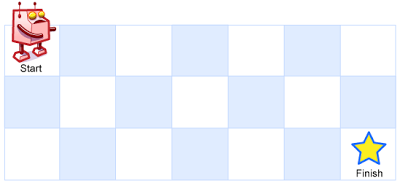

Note: m and n will be at most 100.

Example 1:
```
Input: m = 3, n = 2
Output: 3
Explanation:
From the top-left corner, there are a total of 3 ways to reach the bottom-right corner:
1. Right -> Right -> Down
2. Right -> Down -> Right
3. Down -> Right -> Right
```
Example 2:
```
Input: m = 7, n = 3
Output: 28
```

In [4]:
class Solution:
    def uniquePaths(self, m, n):
        """
        :type m: int
        :type n: int
        :rtype: int
        """
        if m < 1 or n < 1:
            return 0
        
        # rename n & m to rows and columns.
        rows = n
        columns = m
        
        # at least one path exists to each node
        # possible optimization: pick rows/column traversal based
        # on which ever is lower.
        # we cut down the space from O(rows & column) -> O(columns)
        # It is the inner loop dimension that determines the dimension
        # of the auxiliary array
        paths = [0 for _ in range(columns)]
        
        # Visualizing nxm grid as a tree
        
        #      1
        #     / \
        #   1    3           1 1    # number of unique paths to reach a node at given level
        #  /  \ / \
        # 4    5   1       1  2  1
        #  \  / \  /   
        #   2    1          3   3
        #    \  /
        #     1                6
        
        for row in range(rows):
            for column in range(columns):
                if column == 0 or row == 0:
                    # only one way to reach the nodes in first row or first column.
                    paths[column] = 1
                else:
                    paths[column] = paths[column] + paths[column-1]
                    
        
        return paths[-1]
        
    def uniquePathsDPSpaceMN(self, m, n):
        """
        :type m: int
        :type n: int
        :rtype: int
        """
        if m < 1 or n < 1:
            return 0
        
        rows = n
        columns = m
        
        paths = [[0] * columns for _ in range(rows)]
        
        # Visualizing nxm grid as a tree
        
        #      1
        #     / \
        #   1    3           1 1    # number of unique paths to reach a node at given level
        #  /  \ / \
        # 4    5   1       1  2  1
        #  \  / \  /   
        #   2    1          3   3
        #    \  /
        #     1                6
        
        
        for x in range(rows):
            for y in range(columns):
                # can combine these two checks into one.. but keeping it this way
                # for better clarity
                if x == 0:
                    # can reach only from the left.
                    paths[x][y] = 1
                elif y == 0:
                    # can reach only from the top
                    paths[x][y] = 1
                else:
                    # can reach from the top as well as from the left
                    paths[x][y] = paths[x-1][y] + paths[x][y-1]
                
        
        return paths[-1][-1]
        
    
    def uniquePathsRecursion(self, m, n):
        """
        :type m: int
        :type n: int
        :rtype: int
        """
        # 3 x 2
        # - - - 
        # - - -
        # start from the top-left.. can have paths in two directions
        # brute force:
        #   dfs.. recursively go right and down. track the direction along the way
        #   when the finish line is reached, add path to a set.. return the length
        #   of the set when done. 2^n
        #
        # 
        
        def isFinishLine(x, y, m, n):
            return (x == n-1 and y == m-1)
        
        def traverse(x, y, m, n, path, uniquePathSet):
            if x < n and y < m: # m - columns, n - rows
                if isFinishLine(x, y, m, n):
                    # add the path
                    uniquePathSet.add(path)
                
                traverse(x, y+1, m, n, path+"R", uniquePathSet)
                traverse(x+1, y, m, n, path+"D", uniquePathSet)
        
        uniquePathSet = set()
        traverse(0, 0, m, n, "", uniquePathSet)
        return len(uniquePathSet)

In [5]:
testInputs = [
    (3, 3, 6),
    (5, 6, 126),
    (10, 3, 55),
    (10, 30, 163011640)
]

s = Solution()
for m, n, expUniquePaths in testInputs:
    assert(s.uniquePaths(m, n) == expUniquePaths)